In [1]:
import pandas as pd
df = pd.read_excel("C:\\Users\\user\\Desktop\\논문\\key paper\\mouseTracker_data\\Dataset.xlsx")
df = df.replace(['faker','honest'], ['1','2'])
df_T_score = df[['Instructions','S T-score','K T-score','L T-score','VR T-score']]

In [12]:
df = df.drop(['Subject number','Time Pressure'],axis=1)
df.columns

Index(['S T-score', 'S_RT ', 'S_MD ', 'S_AUC ', 'S_MD_time ', 'S_vel X ',
       'S_vel Y ', 'K T-score', 'K_RT ', 'K_MD ', 'K_AUC ', 'K_MD_time ',
       'K_vel X ', 'K_vel Y ', 'L T-score', 'L_RT ', 'L_MD ', 'L_AUC ',
       'L_MD_time ', 'L_vel X ', 'L_vel Y', 'VR T-score', 'VR_RT ', 'VR_MD',
       'VR_AUC', 'VR_MD_time ', 'VR_vel X', 'VR_vel Y', 'Instructions'],
      dtype='object')

Accuracy: 0.82
Confusion Matrix:
[[99 21]
 [22 98]]

Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.82      0.82       120
           2       0.82      0.82      0.82       120

    accuracy                           0.82       240
   macro avg       0.82      0.82      0.82       240
weighted avg       0.82      0.82      0.82       240



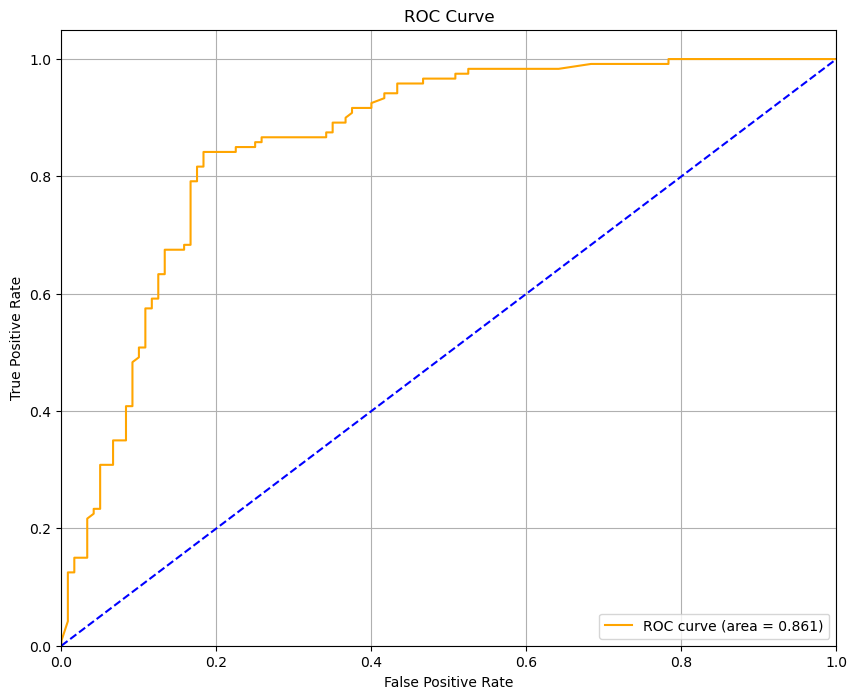

['1' '1' '1' '2' '1' '2' '1' '2' '1' '1' '1' '2' '1' '2' '1' '2' '1' '2'
 '1' '2' '1' '2' '1' '2' '1' '2' '1' '2' '1' '2' '1' '1' '1' '2' '2' '2'
 '1' '2' '1' '2' '1' '2' '1' '2' '1' '2' '1' '2' '1' '2' '1' '2' '1' '2'
 '1' '1' '1' '2' '1' '1' '2' '2' '2' '1' '2' '1' '2' '2' '2' '1' '2' '2'
 '2' '1' '2' '1' '1' '1' '2' '2' '1' '1' '2' '1' '2' '1' '2' '1' '2' '1'
 '2' '2' '2' '2' '1' '1' '2' '1' '1' '1' '2' '2' '2' '1' '1' '1' '2' '1'
 '1' '1' '2' '1' '1' '1' '2' '1' '2' '2' '2' '1' '1' '2' '1' '2' '1' '2'
 '1' '2' '1' '2' '1' '2' '1' '2' '1' '2' '1' '2' '1' '2' '1' '2' '1' '2'
 '1' '2' '1' '2' '2' '2' '1' '2' '1' '2' '1' '2' '1' '2' '1' '2' '1' '2'
 '1' '2' '1' '2' '2' '2' '1' '2' '1' '2' '1' '2' '1' '2' '1' '1' '1' '2'
 '1' '1' '2' '1' '2' '1' '2' '1' '1' '1' '1' '1' '2' '2' '2' '1' '1' '1'
 '2' '1' '2' '1' '2' '1' '2' '1' '2' '2' '1' '1' '2' '2' '2' '2' '2' '2'
 '1' '1' '2' '2' '2' '1' '2' '1' '1' '1' '1' '1' '2' '2' '2' '1' '2' '1'
 '1' '2' '2' '2' '2' '2']


In [13]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# 모델 파일 경로
model_path = "C:/Users/user/Desktop/패널/panel_rfc.pkl"

# 모델 로드
with open(model_path, 'rb') as file:
    rfc_model = pickle.load(file)

# 스케일러 파일 경로 
scaler_path = "C:/Users/user/Desktop/패널/scaler.pkl"

# 스케일러 로드
with open(scaler_path, 'rb') as file:
    scaler = pickle.load(file)

# 실제 값 (target) 로드
y_true = df['Instructions']

# 예측할 데이터
data = df.drop(columns=['Instructions'])

# 피처 이름 정렬 (학습 시 사용된 피처 순서와 일치시킴)
data = data[sorted(data.columns)]

# 스케일링 적용
data_scaled = scaler.transform(data)

# 예측 수행
predictions = rfc_model.predict(data_scaled)
y_pred_prob = rfc_model.predict_proba(data_scaled)[:, 1]  # 양성 클래스의 확률값

# 평가 지표 계산
accuracy = accuracy_score(y_true, predictions)
conf_matrix = confusion_matrix(y_true, predictions)
class_report = classification_report(y_true, predictions)

# 평가 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob, pos_label='2')
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # 대각선 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print(predictions)

In [14]:
df_T_score['Instructions'].value_counts()

Instructions
1    120
2    120
Name: count, dtype: int64